# SINDy-SHRED Tutorial on Sea Surface Temperature (SHRED V1)

In [578]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import Libraries

In [579]:
# PYSHRED
from pyshred import DataManager, SHRED, SHREDEngine, SINDy_Forecaster

# Other helper libraries
import matplotlib.pyplot as plt
from scipy.io import loadmat
import torch
import numpy as np

#### Load in SST Data

In [580]:
mat = loadmat("SST_data.mat")
sst_data = mat['Z'].T
sst_data = sst_data.reshape(1400, 180, 360)
sst_data.shape

(1400, 180, 360)

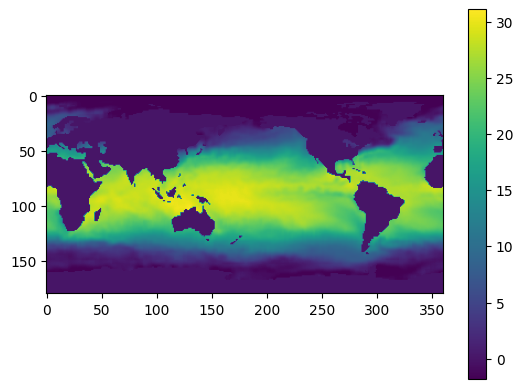

In [581]:
# Plotting a single frame
plt.figure()
plt.imshow(sst_data[0]) 
plt.colorbar()
plt.show()

#### Initialize Data Manager

In [582]:
manager = DataManager(
    lags = 52,
    train_size = 0.8,
    val_size = 0.1,
    test_size = 0.1,
)

#### Add datasets and sensors

In [583]:
manager.add_data(
    data = sst_data,
    id = "SST",
    random = 50,
    # mobile=,
    # stationary=,
    # measurements=,
    compress=False,
)

#### Analyze sensor summary

In [584]:
manager.sensor_summary_df

,data id,number,type,loc/traj
0,SST,0,stationary (random),"(156, 0)"
1,SST,1,stationary (random),"(178, 192)"
2,SST,2,stationary (random),"(64, 43)"
3,SST,3,stationary (random),"(67, 316)"
4,SST,4,stationary (random),"(160, 44)"
5,SST,5,stationary (random),"(169, 199)"
6,SST,6,stationary (random),"(163, 69)"
7,SST,7,stationary (random),"(63, 114)"
8,SST,8,stationary (random),"(153, 220)"
9,SST,9,stationary (random),"(140, 38)"


In [585]:
manager.sensor_measurements_df

data id,SST-0,SST-1,SST-2,SST-3,SST-4,SST-5,SST-6,SST-7,SST-8,SST-9,...,SST-40,SST-41,SST-42,SST-43,SST-44,SST-45,SST-46,SST-47,SST-48,SST-49
0,0.57,-0.0,0.0,24.729999,-0.0,-0.0,-0.0,0.0,-0.14,3.22,...,23.699999,-0.88,3.41,10.36,0.0,16.63,24.599999,-1.80,-0.0,0.0
1,0.79,-0.0,0.0,24.599999,-0.0,-0.0,-0.0,0.0,-0.28,3.45,...,23.449999,-0.83,3.09,9.92,0.0,16.77,24.579999,-1.80,-0.0,0.0
2,0.93,-0.0,0.0,23.919999,-0.0,-0.0,-0.0,0.0,0.00,3.32,...,23.199999,-0.58,2.95,10.24,0.0,17.53,24.149999,-1.80,-0.0,0.0
3,1.08,-0.0,0.0,24.179999,-0.0,-0.0,-0.0,0.0,0.20,3.41,...,22.839999,-0.51,2.72,9.82,0.0,17.62,23.649999,-1.80,-0.0,0.0
4,1.33,-0.0,0.0,23.679999,-0.0,-0.0,-0.0,0.0,0.31,3.49,...,23.059999,-0.18,2.47,9.85,0.0,17.22,23.979999,-1.80,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,-1.78,-0.0,0.0,27.109999,-0.0,-0.0,-0.0,0.0,-1.64,2.12,...,29.329999,-1.72,12.79,13.17,0.0,11.61,27.869999,1.95,-0.0,0.0
1396,-1.78,-0.0,0.0,27.019999,-0.0,-0.0,-0.0,0.0,-1.80,2.07,...,29.249999,-1.80,12.36,12.94,0.0,11.28,27.839999,1.41,-0.0,0.0
1397,-1.79,-0.0,0.0,27.139999,-0.0,-0.0,-0.0,0.0,-1.68,2.20,...,29.289999,-1.65,11.69,12.62,0.0,11.94,27.559999,1.51,-0.0,0.0
1398,-1.76,-0.0,0.0,27.429999,-0.0,-0.0,-0.0,0.0,-1.56,2.35,...,29.679999,-1.43,10.31,12.28,0.0,12.28,27.379999,1.37,-0.0,0.0


#### Get train, validation, and test set

In [586]:
train_dataset, val_dataset, test_dataset= manager.prepare()

#### Initialize a latent forecaster

In [587]:
latent_forecaster = SINDy_Forecaster(poly_order=1, include_sine=True, dt=1/5)

#### Initialize SHRED

In [588]:
shred = SHRED(sequence_model="GRU", decoder_model="SDN", latent_forecaster=latent_forecaster)

#### Fit SHRED

In [ ]:
val_errors = shred.fit(train_dataset=train_dataset, val_dataset=val_dataset, num_epochs=50, thres_epoch=20, sindy_regularization=1)
print('val_errors:', val_errors)

Fitting SindySHRED...
Epoch 1: Average training loss = 0.084400
Validation MSE (epoch 1): 0.034760
Epoch 2: Average training loss = 0.030747
Validation MSE (epoch 2): 0.015909
Epoch 3: Average training loss = 0.020890
Validation MSE (epoch 3): 0.014982
Epoch 4: Average training loss = 0.017996
Validation MSE (epoch 4): 0.013765
Epoch 5: Average training loss = 0.016935
Validation MSE (epoch 5): 0.012789
Epoch 6: Average training loss = 0.016843
Validation MSE (epoch 6): 0.012807
Epoch 7: Average training loss = 0.016457
Validation MSE (epoch 7): 0.012620


#### Evaluate SHRED

In [ ]:
train_mse = shred.evaluate(dataset=train_dataset)
val_mse = shred.evaluate(dataset=val_dataset)
test_mse = shred.evaluate(dataset=test_dataset)
print(f"Train MSE: {train_mse:.3f}")
print(f"Val   MSE: {val_mse:.3f}")
print(f"Test  MSE: {test_mse:.3f}")

Train MSE: 0.033
Val   MSE: 0.034
Test  MSE: 0.038


#### SINDy Discovered Latent Dynamics

In [ ]:
shred.latent_forecaster.model.print()

#### Initialize SHRED Engine for Downstream Tasks

In [ ]:
engine = SHREDEngine(manager, shred)

#### Sensor Measurements to Latent Space

In [ ]:
test_latent_from_sensors = engine.sensor_to_latent(manager.test_sensor_measurements)

#### Forecast Latent Space (No Sensor Measurements)

In [ ]:
val_latents = engine.sensor_to_latent(manager.val_sensor_measurements)
init_latents = val_latents[-1] # seed forecaster with final latent space from val
t = len(manager.test_sensor_measurements)
test_latent_from_forecaster = engine.forecast_latent(t=t, init_latents=init_latents)

RuntimeError: No `latent_forecaster` available. Please initialize SHRED with a `latent_forecaster` model.

#### Decode Latent Space to Full-State Space

In [ ]:
test_prediction = engine.decode(test_latent_from_sensors) # latent space generated from sensor data
test_forecast = engine.decode(test_latent_from_forecaster) # latent space generated from latent forecasted (no sensor data)

Compare final frame in prediction and forecast to ground truth:

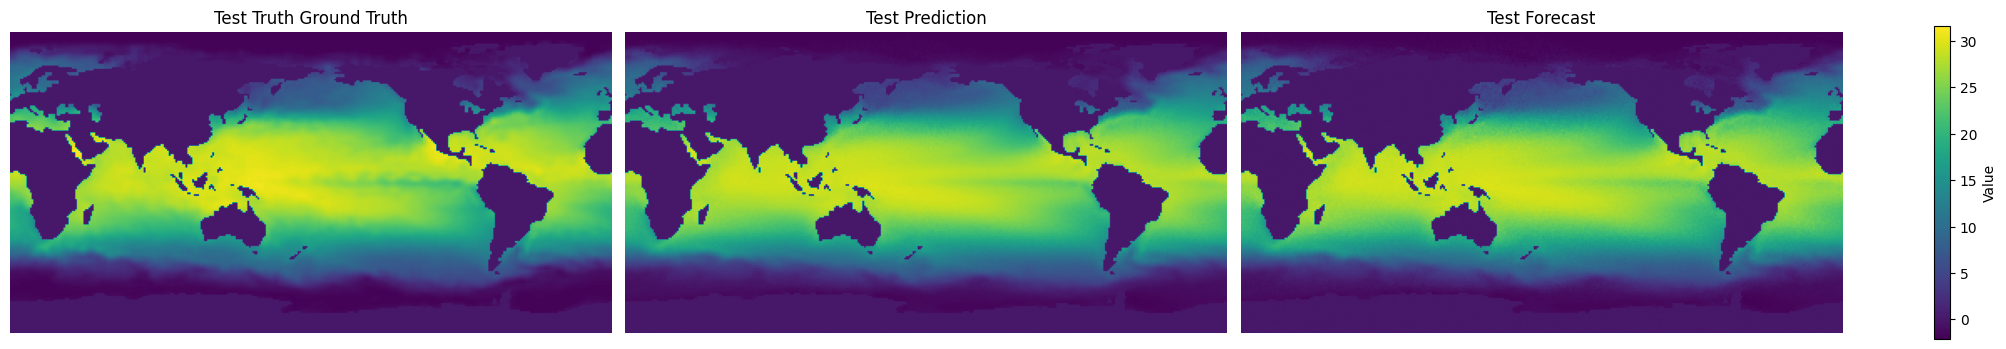

In [ ]:
truth      = sst_data[-1]
prediction = test_prediction['SST'][t-1]
forecast   = test_forecast['SST'][t-1]

data   = [truth, prediction, forecast]
titles = ["Test Truth Ground Truth", "Test Prediction", "Test Forecast"]

vmin, vmax = np.min([d.min() for d in data]), np.max([d.max() for d in data])

fig, axes = plt.subplots(1, 3, figsize=(20, 4), constrained_layout=True)

for ax, d, title in zip(axes, data, titles):
    im = ax.imshow(d, vmin=vmin, vmax=vmax)
    ax.set(title=title)
    ax.axis("off")

fig.colorbar(im, ax=axes, label="Value", shrink=0.8)

#### Evaluate MSE on Ground Truth Data

In [ ]:
# Train
t_train = len(manager.train_sensor_measurements)
train_Y = {'SST': sst_data[0:t_train]}
train_error = engine.evaluate(manager.train_sensor_measurements, train_Y)

# Val
t_val = len(manager.test_sensor_measurements)
val_Y = {'SST': sst_data[t_train:t_train+t_val]}
val_error = engine.evaluate(manager.val_sensor_measurements, val_Y)

# Test
t_test = len(manager.test_sensor_measurements)
test_Y = {'SST': sst_data[-t_test:]}
test_error = engine.evaluate(manager.test_sensor_measurements, test_Y)

print('---------- TRAIN ----------')
print(train_error)
print('\n---------- VAL   ----------')
print(val_error)
print('\n---------- TEST  ----------')
print(test_error)

---------- TRAIN ----------
              MSE      RMSE       MAE        R2
dataset                                        
SST      2.547877  1.596207  0.939837 -0.016449

---------- VAL   ----------
              MSE      RMSE       MAE        R2
dataset                                        
SST      2.681671  1.637581  0.947534 -0.919247

---------- TEST  ----------
             MSE      RMSE       MAE        R2
dataset                                       
SST      2.87626  1.695954  0.992181 -0.796237


## ...END OF TUTORIAL

In [ ]:
# Rate of sparsity
torch.mean(shred.e_sindy.coefficient_mask*1.0)

tensor(1.)

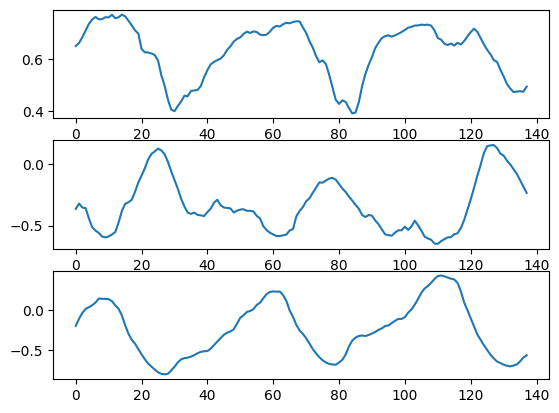

In [ ]:

import matplotlib.pyplot as plt
import pysindy as ps
from pysindy.differentiation import FiniteDifference
gru_outs, sindy_outs = shred.gru_outputs(val_dataset.X, sindy=True)
differentiation_method = FiniteDifference()

latent_dim = 3
fig, ax = plt.subplots(latent_dim)
for i in range(latent_dim):
    ax[i].plot(gru_outs[1:,0,i].detach().cpu().numpy())

(x0)' = -2.060 1 + -2.848 x0 + 1.372 x1 + 5.323 x2
(x1)' = -13.937 1 + -0.944 x0 + -19.575 x1 + -3.915 x2
(x2)' = 8.554 1 + -2.257 x0 + 13.851 x1 + 4.975 x2


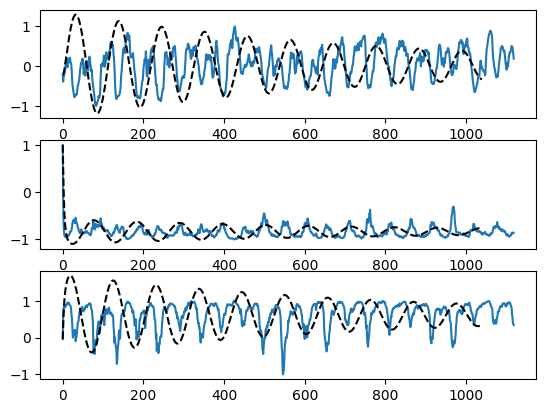

In [ ]:
gru_outs, sindy_outs = shred.gru_outputs(train_dataset.X, sindy=True)
gru_outs = gru_outs[:,0,:]

poly_order = 1
threshold = 0.05

###############Normalization###############

gru_outs[:,0] = (gru_outs[:,0] - torch.min(gru_outs[:,0])) / (torch.max(gru_outs[:,0])-torch.min(gru_outs[:,0]))
gru_outs[:,1] = (gru_outs[:,1] - torch.min(gru_outs[:,1])) / (torch.max(gru_outs[:,1])-torch.min(gru_outs[:,1]))
gru_outs[:,2] = (gru_outs[:,2] - torch.min(gru_outs[:,2])) / (torch.max(gru_outs[:,2])-torch.min(gru_outs[:,2]))

gru_outs = 2 * gru_outs - 1

###############SINDy discovery###############

x = gru_outs.detach().cpu().numpy()

differentiation_method = ps.differentiation.FiniteDifference()
# differentiation_method = ps.differentiation.SmoothedFiniteDifference()

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=0.0, alpha=0.05),
    differentiation_method=differentiation_method,
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)

# model = ps.SINDy(
#     optimizer=ps.MIOSR(group_sparsity=(2,2,2), alpha=5000),
#     differentiation_method=differentiation_method,
#     feature_library=ps.PolynomialLibrary(degree=poly_order),
# )
import math
import numpy as np
np.math = math

t_points = np.arange(0, len(x)) * (1/52.0)
model.fit(x, t=t_points)
model.print()


###############Plot the discovered SINDy model###############

t_train = np.arange(0, 20, 1/52.0)
init_cond = np.zeros(latent_dim)
init_cond[:latent_dim] = gru_outs[0,:].detach().cpu().numpy()
x_sim = model.simulate(init_cond, t_train)

fig, ax = plt.subplots(latent_dim)
for i in range(latent_dim):
    ax[i].plot(gru_outs[:,i].detach().cpu().numpy())
    ax[i].plot(x_sim[:,i], "k--", label="model")